In [7]:
def fizz_buzz_decode(i, prediction):
    return [str(i), "fizz", "buzz", "fizzbuzz"][prediction]

def fizz_buzz_encode(i):
    if i % 15 == 0: return 3
    elif i % 5 == 0: return 2
    elif i % 3 == 0: return 1
    else: return 0

def helper(i):
    print(fizz_buzz_decode(i, fizz_buzz_encode(i)))

for i in range(1,16):
    helper(i)

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz


### 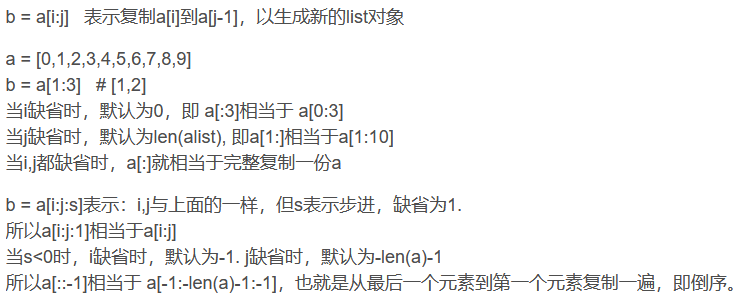

In [8]:
import numpy as np
import torch

NUM_DIGITS = 10

def binary_encode(i, num_digits):
    return np.array([ i >> d & 1 for d in range(num_digits)][::-1])

trX = torch.Tensor([binary_encode(i, NUM_DIGITS) for i in range(101, 2**NUM_DIGITS)])
trY = torch.LongTensor([fizz_buzz_encode(i) for i in range(101, 2 **NUM_DIGITS)])

In [9]:
trX.shape

torch.Size([923, 10])

In [10]:
NUM_HIDDEN = 100
model = torch.nn.Sequential(
    torch.nn.Linear(NUM_DIGITS, NUM_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(NUM_HIDDEN, 4)
)

In [14]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [15]:
Batch_size = 128
for epoch in range(10000):
    train_acc = 0.0
    total_loss = 0.0
    for start in range(0, len(trX), Batch_size):
        end = start + Batch_size
        batchX = trX[start: end]
        batchY = trY[start: end]
        
        preY = model(batchX)
        epochloss = loss(preY, batchY)
        
        optimizer.zero_grad()
        epochloss.backward()
        optimizer.step()
        
        total_loss += epochloss.item()
        train_acc += np.sum(np.argmax(preY.data.numpy(), axis=1) == batchY.numpy())
        
    print("Epoch:", epoch, total_loss,"train_acc", train_acc/len(trX)*100)

Epoch: 0 5.929906189441681 train_acc 75.2979414951246
Epoch: 1 5.9861935675144196 train_acc 71.397616468039
Epoch: 2 5.923778295516968 train_acc 72.15601300108342
Epoch: 3 5.854779779911041 train_acc 76.05633802816901
Epoch: 4 5.830809623003006 train_acc 71.28927410617551
Epoch: 5 5.699547708034515 train_acc 74.10617551462622
Epoch: 6 5.5491505563259125 train_acc 78.9815817984832
Epoch: 7 5.516369730234146 train_acc 75.40628385698808
Epoch: 8 5.4373904168605804 train_acc 76.273022751896
Epoch: 9 5.388995260000229 train_acc 79.63163596966413
Epoch: 10 5.363705366849899 train_acc 78.43986998916577
Epoch: 11 5.329398691654205 train_acc 75.83965330444204
Epoch: 12 5.329217433929443 train_acc 77.68147345612134
Epoch: 13 5.265483200550079 train_acc 80.28169014084507
Epoch: 14 5.366011321544647 train_acc 76.273022751896
Epoch: 15 5.3362016677856445 train_acc 72.80606717226435
Epoch: 16 5.460745602846146 train_acc 76.1646803900325
Epoch: 17 5.459276378154755 train_acc 75.51462621885156
Epoch: 

Epoch: 162 1.480978675186634 train_acc 96.96641386782233
Epoch: 163 1.5092909038066864 train_acc 95.77464788732394
Epoch: 164 1.5180727913975716 train_acc 94.69122426868906
Epoch: 165 1.5156372711062431 train_acc 96.20801733477789
Epoch: 166 1.629993036389351 train_acc 94.69122426868906
Epoch: 167 1.6642526015639305 train_acc 93.28277356446371
Epoch: 168 1.7252017110586166 train_acc 94.2578548212351
Epoch: 169 2.0502388551831245 train_acc 90.465872156013
Epoch: 170 2.0270413011312485 train_acc 90.35752979414951
Epoch: 171 2.5112394839525223 train_acc 87.32394366197182
Epoch: 172 2.8021200075745583 train_acc 84.61538461538461
Epoch: 173 2.7485005259513855 train_acc 85.15709642470206
Epoch: 174 2.838473916053772 train_acc 84.61538461538461
Epoch: 175 2.5901875346899033 train_acc 85.37378114842905
Epoch: 176 2.088267721235752 train_acc 89.16576381365114
Epoch: 177 1.8976228088140488 train_acc 92.84940411700975
Epoch: 178 1.7085835933685303 train_acc 93.71614301191767
Epoch: 179 1.46468218

Epoch: 309 0.6169307418167591 train_acc 99.45828819068255
Epoch: 310 0.6138973217457533 train_acc 99.34994582881906
Epoch: 311 0.611304122954607 train_acc 99.45828819068255
Epoch: 312 0.6094348765909672 train_acc 99.45828819068255
Epoch: 313 0.6047230195254087 train_acc 99.45828819068255
Epoch: 314 0.60297542065382 train_acc 99.45828819068255
Epoch: 315 0.6014979295432568 train_acc 99.45828819068255
Epoch: 316 0.5970138944685459 train_acc 99.45828819068255
Epoch: 317 0.5953834541141987 train_acc 99.45828819068255
Epoch: 318 0.5922158136963844 train_acc 99.45828819068255
Epoch: 319 0.5886999722570181 train_acc 99.45828819068255
Epoch: 320 0.5856325663626194 train_acc 99.45828819068255
Epoch: 321 0.5841964390128851 train_acc 99.45828819068255
Epoch: 322 0.5821717455983162 train_acc 99.45828819068255
Epoch: 323 0.5771225951611996 train_acc 99.45828819068255
Epoch: 324 0.5761663857847452 train_acc 99.45828819068255
Epoch: 325 0.5757768843322992 train_acc 99.45828819068255
Epoch: 326 0.5710

Epoch: 470 0.3180439304560423 train_acc 99.89165763813651
Epoch: 471 0.3162039052695036 train_acc 99.89165763813651
Epoch: 472 0.3148179370909929 train_acc 99.89165763813651
Epoch: 473 0.31392666418105364 train_acc 99.78331527627302
Epoch: 474 0.31276807468384504 train_acc 99.89165763813651
Epoch: 475 0.311345212161541 train_acc 99.78331527627302
Epoch: 476 0.3106223549693823 train_acc 99.89165763813651
Epoch: 477 0.30914548970758915 train_acc 99.78331527627302
Epoch: 478 0.30831744335591793 train_acc 99.89165763813651
Epoch: 479 0.3075049314647913 train_acc 99.89165763813651
Epoch: 480 0.3053725855425 train_acc 99.89165763813651
Epoch: 481 0.3048172350972891 train_acc 99.89165763813651
Epoch: 482 0.30317564215511084 train_acc 99.89165763813651
Epoch: 483 0.30207117553800344 train_acc 99.89165763813651
Epoch: 484 0.3007884994149208 train_acc 99.89165763813651
Epoch: 485 0.3001752467826009 train_acc 99.89165763813651
Epoch: 486 0.29842283949255943 train_acc 99.89165763813651
Epoch: 487 

Epoch: 636 0.16824158560484648 train_acc 100.0
Epoch: 637 0.1735328920185566 train_acc 100.0
Epoch: 638 0.17582987947389483 train_acc 100.0
Epoch: 639 0.1799733890220523 train_acc 100.0
Epoch: 640 0.18639512779191136 train_acc 100.0
Epoch: 641 0.19107584841549397 train_acc 100.0
Epoch: 642 0.24135744338855147 train_acc 99.78331527627302
Epoch: 643 0.2667629970237613 train_acc 99.67497291440954
Epoch: 644 0.32199194841086864 train_acc 99.67497291440954
Epoch: 645 0.57958820508793 train_acc 96.96641386782233
Epoch: 646 0.7607933674007654 train_acc 96.64138678223185
Epoch: 647 2.0775076784193516 train_acc 89.27410617551462
Epoch: 648 3.251284033060074 train_acc 82.99024918743228
Epoch: 649 10.289429426193237 train_acc 70.5308775731311
Epoch: 650 12.098322570323944 train_acc 64.35536294691224
Epoch: 651 14.40249216556549 train_acc 63.055254604550385
Epoch: 652 4.144762694835663 train_acc 82.55687973997833
Epoch: 653 2.110845912247896 train_acc 90.79089924160346
Epoch: 654 0.925150409340858

Epoch: 824 0.10438373754732311 train_acc 100.0
Epoch: 825 0.10419315076433122 train_acc 100.0
Epoch: 826 0.10389401903375983 train_acc 100.0
Epoch: 827 0.10353580280207098 train_acc 100.0
Epoch: 828 0.10327777732163668 train_acc 100.0
Epoch: 829 0.1030182889662683 train_acc 100.0
Epoch: 830 0.10268132109194994 train_acc 100.0
Epoch: 831 0.10244099516421556 train_acc 100.0
Epoch: 832 0.10215660650283098 train_acc 100.0
Epoch: 833 0.1019500051625073 train_acc 100.0
Epoch: 834 0.10158471367321908 train_acc 100.0
Epoch: 835 0.10135514731518924 train_acc 100.0
Epoch: 836 0.10104531748220325 train_acc 100.0
Epoch: 837 0.10074979974888265 train_acc 100.0
Epoch: 838 0.10054703871719539 train_acc 100.0
Epoch: 839 0.10030737100169063 train_acc 100.0
Epoch: 840 0.09994847513735294 train_acc 100.0
Epoch: 841 0.09977629617787898 train_acc 100.0
Epoch: 842 0.09946378995664418 train_acc 100.0
Epoch: 843 0.09909888147376478 train_acc 100.0
Epoch: 844 0.09887966327369213 train_acc 100.0
Epoch: 845 0.09

Epoch: 1002 0.061497567454352975 train_acc 100.0
Epoch: 1003 0.061359138460829854 train_acc 100.0
Epoch: 1004 0.061063130386173725 train_acc 100.0
Epoch: 1005 0.060980130452662706 train_acc 100.0
Epoch: 1006 0.06078485120087862 train_acc 100.0
Epoch: 1007 0.06056919018737972 train_acc 100.0
Epoch: 1008 0.060329171596094966 train_acc 100.0
Epoch: 1009 0.060080778785049915 train_acc 100.0
Epoch: 1010 0.05983592104166746 train_acc 100.0
Epoch: 1011 0.059731742134317756 train_acc 100.0
Epoch: 1012 0.05945483222603798 train_acc 100.0
Epoch: 1013 0.059389547910541296 train_acc 100.0
Epoch: 1014 0.05917098023928702 train_acc 100.0
Epoch: 1015 0.0590888902079314 train_acc 100.0
Epoch: 1016 0.05873734876513481 train_acc 100.0
Epoch: 1017 0.05858931643888354 train_acc 100.0
Epoch: 1018 0.05838406621478498 train_acc 100.0
Epoch: 1019 0.05823508673347533 train_acc 100.0
Epoch: 1020 0.05798989022150636 train_acc 100.0
Epoch: 1021 0.05780229042284191 train_acc 100.0
Epoch: 1022 0.057559625478461385 

Epoch: 1186 0.0973472697660327 train_acc 100.0
Epoch: 1187 0.09186649415642023 train_acc 100.0
Epoch: 1188 0.08666471973992884 train_acc 100.0
Epoch: 1189 0.08310740767046809 train_acc 100.0
Epoch: 1190 0.07973355776630342 train_acc 100.0
Epoch: 1191 0.07690427545458078 train_acc 100.0
Epoch: 1192 0.07451474922709167 train_acc 100.0
Epoch: 1193 0.07245376193895936 train_acc 100.0
Epoch: 1194 0.07061119447462261 train_acc 100.0
Epoch: 1195 0.06892999284900725 train_acc 100.0
Epoch: 1196 0.06745893252082169 train_acc 100.0
Epoch: 1197 0.06611776794306934 train_acc 100.0
Epoch: 1198 0.06484990171156824 train_acc 100.0
Epoch: 1199 0.06370111019350588 train_acc 100.0
Epoch: 1200 0.06259621283970773 train_acc 100.0
Epoch: 1201 0.06157100503332913 train_acc 100.0
Epoch: 1202 0.060602787183597684 train_acc 100.0
Epoch: 1203 0.05971098062582314 train_acc 100.0
Epoch: 1204 0.05890357051976025 train_acc 100.0
Epoch: 1205 0.05814848165027797 train_acc 100.0
Epoch: 1206 0.05745778256095946 train_ac

Epoch: 1373 0.03210689325351268 train_acc 100.0
Epoch: 1374 0.032049921224825084 train_acc 100.0
Epoch: 1375 0.03199371218215674 train_acc 100.0
Epoch: 1376 0.03195195540320128 train_acc 100.0
Epoch: 1377 0.031884356401860714 train_acc 100.0
Epoch: 1378 0.03183524310588837 train_acc 100.0
Epoch: 1379 0.03178296622354537 train_acc 100.0
Epoch: 1380 0.0317317865556106 train_acc 100.0
Epoch: 1381 0.031685743015259504 train_acc 100.0
Epoch: 1382 0.03163147100713104 train_acc 100.0
Epoch: 1383 0.03157775697764009 train_acc 100.0
Epoch: 1384 0.03153293009381741 train_acc 100.0
Epoch: 1385 0.03147976566106081 train_acc 100.0
Epoch: 1386 0.03143125132191926 train_acc 100.0
Epoch: 1387 0.031376626691780984 train_acc 100.0
Epoch: 1388 0.031321801943704486 train_acc 100.0
Epoch: 1389 0.03128023841418326 train_acc 100.0
Epoch: 1390 0.031224597245454788 train_acc 100.0
Epoch: 1391 0.0311785617377609 train_acc 100.0
Epoch: 1392 0.031127756810747087 train_acc 100.0
Epoch: 1393 0.031077002873644233 tr

Epoch: 1548 0.024121686001308262 train_acc 100.0
Epoch: 1549 0.02408690092852339 train_acc 100.0
Epoch: 1550 0.024035312584601343 train_acc 100.0
Epoch: 1551 0.02398564195027575 train_acc 100.0
Epoch: 1552 0.023952020041178912 train_acc 100.0
Epoch: 1553 0.023900990840047598 train_acc 100.0
Epoch: 1554 0.023861845897044986 train_acc 100.0
Epoch: 1555 0.023820987436920404 train_acc 100.0
Epoch: 1556 0.023772784566972405 train_acc 100.0
Epoch: 1557 0.02372529625426978 train_acc 100.0
Epoch: 1558 0.023689917579758912 train_acc 100.0
Epoch: 1559 0.023649473034311086 train_acc 100.0
Epoch: 1560 0.023594733967911452 train_acc 100.0
Epoch: 1561 0.023543159244582057 train_acc 100.0
Epoch: 1562 0.023519759881310165 train_acc 100.0
Epoch: 1563 0.023467931430786848 train_acc 100.0
Epoch: 1564 0.02341758768307045 train_acc 100.0
Epoch: 1565 0.023385100241284817 train_acc 100.0
Epoch: 1566 0.02333989314502105 train_acc 100.0
Epoch: 1567 0.023289743694476783 train_acc 100.0
Epoch: 1568 0.02324224956

Epoch: 1736 0.015931992616970092 train_acc 100.0
Epoch: 1737 0.015881525760050863 train_acc 100.0
Epoch: 1738 0.01583478949032724 train_acc 100.0
Epoch: 1739 0.015810236043762416 train_acc 100.0
Epoch: 1740 0.015758998517412692 train_acc 100.0
Epoch: 1741 0.01571288687409833 train_acc 100.0
Epoch: 1742 0.015672274632379413 train_acc 100.0
Epoch: 1743 0.015619911893736571 train_acc 100.0
Epoch: 1744 0.015583707659970969 train_acc 100.0
Epoch: 1745 0.015542411769274622 train_acc 100.0
Epoch: 1746 0.015498982626013458 train_acc 100.0
Epoch: 1747 0.01548436185112223 train_acc 100.0
Epoch: 1748 0.015427949139848351 train_acc 100.0
Epoch: 1749 0.015389694075565785 train_acc 100.0
Epoch: 1750 0.015326788299717009 train_acc 100.0
Epoch: 1751 0.015298504964448512 train_acc 100.0
Epoch: 1752 0.015269351773895323 train_acc 100.0
Epoch: 1753 0.015220890985801816 train_acc 100.0
Epoch: 1754 0.015192079881671816 train_acc 100.0
Epoch: 1755 0.015140873147174716 train_acc 100.0
Epoch: 1756 0.015130916

Epoch: 1916 0.009275463758967817 train_acc 100.0
Epoch: 1917 0.009231744828866795 train_acc 100.0
Epoch: 1918 0.009207705676089972 train_acc 100.0
Epoch: 1919 0.009197608073009178 train_acc 100.0
Epoch: 1920 0.009153210354270414 train_acc 100.0
Epoch: 1921 0.009120847273152322 train_acc 100.0
Epoch: 1922 0.00905141161638312 train_acc 100.0
Epoch: 1923 0.009044768026797101 train_acc 100.0
Epoch: 1924 0.009058143274160102 train_acc 100.0
Epoch: 1925 0.008991061215056106 train_acc 100.0
Epoch: 1926 0.008991321781650186 train_acc 100.0
Epoch: 1927 0.008925242786062881 train_acc 100.0
Epoch: 1928 0.008952235657488927 train_acc 100.0
Epoch: 1929 0.00897669221740216 train_acc 100.0
Epoch: 1930 0.008910438802558929 train_acc 100.0
Epoch: 1931 0.008915041835280135 train_acc 100.0
Epoch: 1932 0.008761516452068463 train_acc 100.0
Epoch: 1933 0.008744512277189642 train_acc 100.0
Epoch: 1934 0.00873432244407013 train_acc 100.0
Epoch: 1935 0.008706005930434912 train_acc 100.0
Epoch: 1936 0.008707698

Epoch: 2087 0.013576763973105699 train_acc 100.0
Epoch: 2088 0.013470293895807117 train_acc 100.0
Epoch: 2089 0.013366974948439747 train_acc 100.0
Epoch: 2090 0.013262220832984895 train_acc 100.0
Epoch: 2091 0.013162180141080171 train_acc 100.0
Epoch: 2092 0.013062078156508505 train_acc 100.0
Epoch: 2093 0.01296621561050415 train_acc 100.0
Epoch: 2094 0.01287043490447104 train_acc 100.0
Epoch: 2095 0.012778008473105729 train_acc 100.0
Epoch: 2096 0.012687912676483393 train_acc 100.0
Epoch: 2097 0.012600236863363534 train_acc 100.0
Epoch: 2098 0.012514883652329445 train_acc 100.0
Epoch: 2099 0.012432411429472268 train_acc 100.0
Epoch: 2100 0.012352263438515365 train_acc 100.0
Epoch: 2101 0.012272385123651475 train_acc 100.0
Epoch: 2102 0.012196851428598166 train_acc 100.0
Epoch: 2103 0.012118767015635967 train_acc 100.0
Epoch: 2104 0.012044052011333406 train_acc 100.0
Epoch: 2105 0.01196845102822408 train_acc 100.0
Epoch: 2106 0.011893924413016066 train_acc 100.0
Epoch: 2107 0.011821260

Epoch: 2271 0.00686864266754128 train_acc 100.0
Epoch: 2272 0.006857334636151791 train_acc 100.0
Epoch: 2273 0.006843980721896514 train_acc 100.0
Epoch: 2274 0.006827377015724778 train_acc 100.0
Epoch: 2275 0.0068131393200019374 train_acc 100.0
Epoch: 2276 0.006801889307098463 train_acc 100.0
Epoch: 2277 0.006790719329728745 train_acc 100.0
Epoch: 2278 0.006776043941499665 train_acc 100.0
Epoch: 2279 0.006760598815162666 train_acc 100.0
Epoch: 2280 0.00675183319253847 train_acc 100.0
Epoch: 2281 0.006735569215379655 train_acc 100.0
Epoch: 2282 0.006722989055560902 train_acc 100.0
Epoch: 2283 0.006710386092890985 train_acc 100.0
Epoch: 2284 0.006696920623653568 train_acc 100.0
Epoch: 2285 0.006683387138764374 train_acc 100.0
Epoch: 2286 0.006674159871181473 train_acc 100.0
Epoch: 2287 0.006661808612989262 train_acc 100.0
Epoch: 2288 0.006646820969763212 train_acc 100.0
Epoch: 2289 0.006633559460169636 train_acc 100.0
Epoch: 2290 0.006623011067858897 train_acc 100.0
Epoch: 2291 0.0066137

Epoch: 2457 0.005278469281620346 train_acc 100.0
Epoch: 2458 0.005273835835396312 train_acc 100.0
Epoch: 2459 0.005265108746243641 train_acc 100.0
Epoch: 2460 0.005260594742139801 train_acc 100.0
Epoch: 2461 0.005257721510133706 train_acc 100.0
Epoch: 2462 0.00525073659082409 train_acc 100.0
Epoch: 2463 0.00524078423040919 train_acc 100.0
Epoch: 2464 0.0052366329182405025 train_acc 100.0
Epoch: 2465 0.005228484747931361 train_acc 100.0
Epoch: 2466 0.005222567880991846 train_acc 100.0
Epoch: 2467 0.005216218167333864 train_acc 100.0
Epoch: 2468 0.005209559094510041 train_acc 100.0
Epoch: 2469 0.005202896732953377 train_acc 100.0
Epoch: 2470 0.00519709091167897 train_acc 100.0
Epoch: 2471 0.005191320655285381 train_acc 100.0
Epoch: 2472 0.005188663286389783 train_acc 100.0
Epoch: 2473 0.005182521097594872 train_acc 100.0
Epoch: 2474 0.005173613069928251 train_acc 100.0
Epoch: 2475 0.005167464260011911 train_acc 100.0
Epoch: 2476 0.005160150656593032 train_acc 100.0
Epoch: 2477 0.00515382

Epoch: 2642 0.004181660391623154 train_acc 100.0
Epoch: 2643 0.004175869544269517 train_acc 100.0
Epoch: 2644 0.004169096777332015 train_acc 100.0
Epoch: 2645 0.004162758879829198 train_acc 100.0
Epoch: 2646 0.004157845993177034 train_acc 100.0
Epoch: 2647 0.004151651635766029 train_acc 100.0
Epoch: 2648 0.004145010796491988 train_acc 100.0
Epoch: 2649 0.004139687414863147 train_acc 100.0
Epoch: 2650 0.004135425260756165 train_acc 100.0
Epoch: 2651 0.004127270309254527 train_acc 100.0
Epoch: 2652 0.004122684360481799 train_acc 100.0
Epoch: 2653 0.004117027914617211 train_acc 100.0
Epoch: 2654 0.004110832276637666 train_acc 100.0
Epoch: 2655 0.0041044987010536715 train_acc 100.0
Epoch: 2656 0.00410002596618142 train_acc 100.0
Epoch: 2657 0.0040935041615739465 train_acc 100.0
Epoch: 2658 0.004087818684638478 train_acc 100.0
Epoch: 2659 0.004082026120158844 train_acc 100.0
Epoch: 2660 0.004076581099070609 train_acc 100.0
Epoch: 2661 0.004071211835253052 train_acc 100.0
Epoch: 2662 0.00406

Epoch: 2808 0.0031525567683274858 train_acc 100.0
Epoch: 2809 0.0031435789860552177 train_acc 100.0
Epoch: 2810 0.0031399409781442955 train_acc 100.0
Epoch: 2811 0.0031310286503867246 train_acc 100.0
Epoch: 2812 0.0031260455871233717 train_acc 100.0
Epoch: 2813 0.0031169696303550154 train_acc 100.0
Epoch: 2814 0.003112338512437418 train_acc 100.0
Epoch: 2815 0.003104431976680644 train_acc 100.0
Epoch: 2816 0.0030992998072179034 train_acc 100.0
Epoch: 2817 0.0030914833769202232 train_acc 100.0
Epoch: 2818 0.003085891941736918 train_acc 100.0
Epoch: 2819 0.0030775395935052074 train_acc 100.0
Epoch: 2820 0.0030704153105034493 train_acc 100.0
Epoch: 2821 0.0030620618563261814 train_acc 100.0
Epoch: 2822 0.0030565851484425366 train_acc 100.0
Epoch: 2823 0.0030491506040561944 train_acc 100.0
Epoch: 2824 0.0030426616649492644 train_acc 100.0
Epoch: 2825 0.0030364573540282436 train_acc 100.0
Epoch: 2826 0.0030298653291538358 train_acc 100.0
Epoch: 2827 0.003024434845428914 train_acc 100.0
Epoc

Epoch: 2987 0.00202008515043417 train_acc 100.0
Epoch: 2988 0.0020132937643211335 train_acc 100.0
Epoch: 2989 0.0020119641922065057 train_acc 100.0
Epoch: 2990 0.0020058809968759306 train_acc 100.0
Epoch: 2991 0.0020009368745377287 train_acc 100.0
Epoch: 2992 0.001995191036257893 train_acc 100.0
Epoch: 2993 0.0019914397053071298 train_acc 100.0
Epoch: 2994 0.0019859315871144645 train_acc 100.0
Epoch: 2995 0.0019812621394521557 train_acc 100.0
Epoch: 2996 0.001975034931092523 train_acc 100.0
Epoch: 2997 0.0019692647183546796 train_acc 100.0
Epoch: 2998 0.0019651752154459246 train_acc 100.0
Epoch: 2999 0.0019604236440500244 train_acc 100.0
Epoch: 3000 0.0019569275973481126 train_acc 100.0
Epoch: 3001 0.0019524249728419818 train_acc 100.0
Epoch: 3002 0.0019493901854730211 train_acc 100.0
Epoch: 3003 0.001948745280969888 train_acc 100.0
Epoch: 3004 0.0019365296902833506 train_acc 100.0
Epoch: 3005 0.0019324954046169296 train_acc 100.0
Epoch: 3006 0.0019269745171186514 train_acc 100.0
Epoch

Epoch: 3170 0.0012337379230302759 train_acc 100.0
Epoch: 3171 0.0012300703456276096 train_acc 100.0
Epoch: 3172 0.0012258392489457037 train_acc 100.0
Epoch: 3173 0.0012206002029415686 train_acc 100.0
Epoch: 3174 0.0012183271210233215 train_acc 100.0
Epoch: 3175 0.0012146021217631642 train_acc 100.0
Epoch: 3176 0.0012106333306292072 train_acc 100.0
Epoch: 3177 0.001207028024509782 train_acc 100.0
Epoch: 3178 0.0012036033149342984 train_acc 100.0
Epoch: 3179 0.0012003312222077511 train_acc 100.0
Epoch: 3180 0.0011984092852799222 train_acc 100.0
Epoch: 3181 0.0011926013030461036 train_acc 100.0
Epoch: 3182 0.001188733436720213 train_acc 100.0
Epoch: 3183 0.0011851028866658453 train_acc 100.0
Epoch: 3184 0.0011818083548860159 train_acc 100.0
Epoch: 3185 0.001178568636532873 train_acc 100.0
Epoch: 3186 0.0011747538374038413 train_acc 100.0
Epoch: 3187 0.0011731967933883425 train_acc 100.0
Epoch: 3188 0.001169277064036578 train_acc 100.0
Epoch: 3189 0.00116488080311683 train_acc 100.0
Epoch:

Epoch: 3352 0.0006767227696400369 train_acc 100.0
Epoch: 3353 0.0006756721813871991 train_acc 100.0
Epoch: 3354 0.0006739561358699575 train_acc 100.0
Epoch: 3355 0.000670925446684123 train_acc 100.0
Epoch: 3356 0.0006685615007882006 train_acc 100.0
Epoch: 3357 0.000666762412947719 train_acc 100.0
Epoch: 3358 0.0006629527106269961 train_acc 100.0
Epoch: 3359 0.0006611285953113111 train_acc 100.0
Epoch: 3360 0.0006609790107177105 train_acc 100.0
Epoch: 3361 0.0006555422623932827 train_acc 100.0
Epoch: 3362 0.0006549521222041221 train_acc 100.0
Epoch: 3363 0.0006507130492536817 train_acc 100.0
Epoch: 3364 0.0006495801153505454 train_acc 100.0
Epoch: 3365 0.0006474717993114609 train_acc 100.0
Epoch: 3366 0.0006435337145376252 train_acc 100.0
Epoch: 3367 0.0006422882725019008 train_acc 100.0
Epoch: 3368 0.0006390080779965501 train_acc 100.0
Epoch: 3369 0.000637415405435604 train_acc 100.0
Epoch: 3370 0.0006350467920128722 train_acc 100.0
Epoch: 3371 0.0006318683153949678 train_acc 100.0
Epo

Epoch: 3524 0.0003625129338615807 train_acc 100.0
Epoch: 3525 0.0003605181855164119 train_acc 100.0
Epoch: 3526 0.0003586927014112007 train_acc 100.0
Epoch: 3527 0.0003568211104720831 train_acc 100.0
Epoch: 3528 0.00035591980940807844 train_acc 100.0
Epoch: 3529 0.0003537807260727277 train_acc 100.0
Epoch: 3530 0.00035358038257982116 train_acc 100.0
Epoch: 3531 0.0003526569680616376 train_acc 100.0
Epoch: 3532 0.0003501206911096233 train_acc 100.0
Epoch: 3533 0.0003487968697299948 train_acc 100.0
Epoch: 3534 0.00034813206093531335 train_acc 100.0
Epoch: 3535 0.0003460874231677735 train_acc 100.0
Epoch: 3536 0.0003449460518822889 train_acc 100.0
Epoch: 3537 0.00034395402326481417 train_acc 100.0
Epoch: 3538 0.00034267174578417325 train_acc 100.0
Epoch: 3539 0.0003417970647205948 train_acc 100.0
Epoch: 3540 0.0003402499914955115 train_acc 100.0
Epoch: 3541 0.00033926342712220503 train_acc 100.0
Epoch: 3542 0.0003376860568096163 train_acc 100.0
Epoch: 3543 0.0003360323362358031 train_acc 

Epoch: 3704 0.00018351648350289906 train_acc 100.0
Epoch: 3705 0.00017994864356296603 train_acc 100.0
Epoch: 3706 0.00018118580692316755 train_acc 100.0
Epoch: 3707 0.00018153838254875154 train_acc 100.0
Epoch: 3708 0.00018099739963872707 train_acc 100.0
Epoch: 3709 0.00018099527960657724 train_acc 100.0
Epoch: 3710 0.0001775188807187078 train_acc 100.0
Epoch: 3711 0.00017932137870957376 train_acc 100.0
Epoch: 3712 0.00017860805110103684 train_acc 100.0
Epoch: 3713 0.00017683237638266291 train_acc 100.0
Epoch: 3714 0.00017646287096795277 train_acc 100.0
Epoch: 3715 0.00017437526730645914 train_acc 100.0
Epoch: 3716 0.00017497844601166435 train_acc 100.0
Epoch: 3717 0.00017610354825592367 train_acc 100.0
Epoch: 3718 0.0001747134842844389 train_acc 100.0
Epoch: 3719 0.0001751201098159072 train_acc 100.0
Epoch: 3720 0.0001743113798511331 train_acc 100.0
Epoch: 3721 0.00017651459256740054 train_acc 100.0
Epoch: 3722 0.00017592574431546382 train_acc 100.0
Epoch: 3723 0.00017150702069557155 

Epoch: 3886 0.0013241926826594863 train_acc 100.0
Epoch: 3887 0.0013177129258110654 train_acc 100.0
Epoch: 3888 0.00131128298380645 train_acc 100.0
Epoch: 3889 0.0013049299450358376 train_acc 100.0
Epoch: 3890 0.0012986280962650198 train_acc 100.0
Epoch: 3891 0.0012924297552672215 train_acc 100.0
Epoch: 3892 0.0012862458679592237 train_acc 100.0
Epoch: 3893 0.0012801299235434271 train_acc 100.0
Epoch: 3894 0.0012740670827042777 train_acc 100.0
Epoch: 3895 0.0012680888794420753 train_acc 100.0
Epoch: 3896 0.0012621919486264233 train_acc 100.0
Epoch: 3897 0.0012563316049636342 train_acc 100.0
Epoch: 3898 0.0012505393751780502 train_acc 100.0
Epoch: 3899 0.0012447627595975064 train_acc 100.0
Epoch: 3900 0.0012390735937515274 train_acc 100.0
Epoch: 3901 0.0012334520724834874 train_acc 100.0
Epoch: 3902 0.0012278546855668537 train_acc 100.0
Epoch: 3903 0.001222316630446585 train_acc 100.0
Epoch: 3904 0.0012168209032097366 train_acc 100.0
Epoch: 3905 0.0012113882767152973 train_acc 100.0
Epo

Epoch: 4067 0.0006790225797885796 train_acc 100.0
Epoch: 4068 0.0006770381423848448 train_acc 100.0
Epoch: 4069 0.0006750813936378108 train_acc 100.0
Epoch: 4070 0.0006731441335432464 train_acc 100.0
Epoch: 4071 0.0006711962032568408 train_acc 100.0
Epoch: 4072 0.0006692416754958685 train_acc 100.0
Epoch: 4073 0.0006673048956145067 train_acc 100.0
Epoch: 4074 0.000665399011268164 train_acc 100.0
Epoch: 4075 0.0006634919609496137 train_acc 100.0
Epoch: 4076 0.0006615860875172075 train_acc 100.0
Epoch: 4077 0.0006597078463528305 train_acc 100.0
Epoch: 4078 0.0006578196316695539 train_acc 100.0
Epoch: 4079 0.0006559558096341789 train_acc 100.0
Epoch: 4080 0.0006540813337778673 train_acc 100.0
Epoch: 4081 0.0006522405274154153 train_acc 100.0
Epoch: 4082 0.0006503781132778386 train_acc 100.0
Epoch: 4083 0.0006485338126367424 train_acc 100.0
Epoch: 4084 0.0006467311468441039 train_acc 100.0
Epoch: 4085 0.0006448987078329083 train_acc 100.0
Epoch: 4086 0.0006431234578485601 train_acc 100.0
E

Epoch: 4246 0.00043015374285459984 train_acc 100.0
Epoch: 4247 0.00042920246050925925 train_acc 100.0
Epoch: 4248 0.0004282828067516675 train_acc 100.0
Epoch: 4249 0.0004273368012945866 train_acc 100.0
Epoch: 4250 0.0004263950013410067 train_acc 100.0
Epoch: 4251 0.000425458318204619 train_acc 100.0
Epoch: 4252 0.0004245198088028701 train_acc 100.0
Epoch: 4253 0.00042361338637419976 train_acc 100.0
Epoch: 4254 0.00042269302139175124 train_acc 100.0
Epoch: 4255 0.0004217882487864699 train_acc 100.0
Epoch: 4256 0.00042086277244379744 train_acc 100.0
Epoch: 4257 0.00041996703475888353 train_acc 100.0
Epoch: 4258 0.00041908640559995547 train_acc 100.0
Epoch: 4259 0.00041819769103312865 train_acc 100.0
Epoch: 4260 0.0004173413253738545 train_acc 100.0
Epoch: 4261 0.000416419743487495 train_acc 100.0
Epoch: 4262 0.0004155401184107177 train_acc 100.0
Epoch: 4263 0.0004146927494730335 train_acc 100.0
Epoch: 4264 0.0004137837904636399 train_acc 100.0
Epoch: 4265 0.0004129258140892489 train_acc 

Epoch: 4416 0.0003087286377194687 train_acc 100.0
Epoch: 4417 0.0003081774821112049 train_acc 100.0
Epoch: 4418 0.0003076088896705187 train_acc 100.0
Epoch: 4419 0.0003070405455218861 train_acc 100.0
Epoch: 4420 0.0003064600641664583 train_acc 100.0
Epoch: 4421 0.00030593169140047394 train_acc 100.0
Epoch: 4422 0.0003053263480978785 train_acc 100.0
Epoch: 4423 0.00030480989971692907 train_acc 100.0
Epoch: 4424 0.0003042538291992969 train_acc 100.0
Epoch: 4425 0.00030368731495400425 train_acc 100.0
Epoch: 4426 0.00030314010928123025 train_acc 100.0
Epoch: 4427 0.00030257473827077774 train_acc 100.0
Epoch: 4428 0.00030203014102880843 train_acc 100.0
Epoch: 4429 0.0003014780404555495 train_acc 100.0
Epoch: 4430 0.0003009139090863755 train_acc 100.0
Epoch: 4431 0.0003003894817084074 train_acc 100.0
Epoch: 4432 0.000299856497804285 train_acc 100.0
Epoch: 4433 0.00029931022345408564 train_acc 100.0
Epoch: 4434 0.0002987567422678694 train_acc 100.0
Epoch: 4435 0.0002982277001137845 train_acc 

Epoch: 4584 0.00023205035176943056 train_acc 100.0
Epoch: 4585 0.00023171239172370406 train_acc 100.0
Epoch: 4586 0.00023133667673391756 train_acc 100.0
Epoch: 4587 0.00023096609766071197 train_acc 100.0
Epoch: 4588 0.00023059692603055737 train_acc 100.0
Epoch: 4589 0.00023022499044600409 train_acc 100.0
Epoch: 4590 0.0002298700146639021 train_acc 100.0
Epoch: 4591 0.0002295375934409094 train_acc 100.0
Epoch: 4592 0.0002291537916789821 train_acc 100.0
Epoch: 4593 0.0002288104333274532 train_acc 100.0
Epoch: 4594 0.00022844032082502963 train_acc 100.0
Epoch: 4595 0.00022807719324191567 train_acc 100.0
Epoch: 4596 0.0002277289931953419 train_acc 100.0
Epoch: 4597 0.00022736308437742991 train_acc 100.0
Epoch: 4598 0.00022700133922626264 train_acc 100.0
Epoch: 4599 0.00022664754078505212 train_acc 100.0
Epoch: 4600 0.00022628630267718108 train_acc 100.0
Epoch: 4601 0.00022595063092012424 train_acc 100.0
Epoch: 4602 0.0002256121656500909 train_acc 100.0
Epoch: 4603 0.0002252539502478612 tra

Epoch: 4753 0.00018161617026635213 train_acc 100.0
Epoch: 4754 0.00018135963910026476 train_acc 100.0
Epoch: 4755 0.00018113546866516117 train_acc 100.0
Epoch: 4756 0.00018089291734213475 train_acc 100.0
Epoch: 4757 0.0001806826990105037 train_acc 100.0
Epoch: 4758 0.00018040988743450725 train_acc 100.0
Epoch: 4759 0.00018018036826106254 train_acc 100.0
Epoch: 4760 0.00017992663515542517 train_acc 100.0
Epoch: 4761 0.00017969617465496412 train_acc 100.0
Epoch: 4762 0.0001794543095456902 train_acc 100.0
Epoch: 4763 0.00017923734594660345 train_acc 100.0
Epoch: 4764 0.00017899758222483797 train_acc 100.0
Epoch: 4765 0.00017874197374112555 train_acc 100.0
Epoch: 4766 0.00017849267169367522 train_acc 100.0
Epoch: 4767 0.0001782813105819514 train_acc 100.0
Epoch: 4768 0.0001780205798240786 train_acc 100.0
Epoch: 4769 0.00017778827032088884 train_acc 100.0
Epoch: 4770 0.00017755315502654412 train_acc 100.0
Epoch: 4771 0.0001773208414306282 train_acc 100.0
Epoch: 4772 0.00017708200266497442 t

Epoch: 4929 0.00014517275576508837 train_acc 100.0
Epoch: 4930 0.00014500444785880973 train_acc 100.0
Epoch: 4931 0.0001448096068088489 train_acc 100.0
Epoch: 4932 0.0001446375690647983 train_acc 100.0
Epoch: 4933 0.00014444133330471232 train_acc 100.0
Epoch: 4934 0.00014426743200601777 train_acc 100.0
Epoch: 4935 0.00014408421748157707 train_acc 100.0
Epoch: 4936 0.0001438823928765487 train_acc 100.0
Epoch: 4937 0.00014374921738635749 train_acc 100.0
Epoch: 4938 0.00014353993174154311 train_acc 100.0
Epoch: 4939 0.00014337489892568556 train_acc 100.0
Epoch: 4940 0.00014318586408990086 train_acc 100.0
Epoch: 4941 0.00014301102419267409 train_acc 100.0
Epoch: 4942 0.00014281106314228964 train_acc 100.0
Epoch: 4943 0.00014265159325077548 train_acc 100.0
Epoch: 4944 0.00014247119906940497 train_acc 100.0
Epoch: 4945 0.0001422712298335682 train_acc 100.0
Epoch: 4946 0.00014213085341907572 train_acc 100.0
Epoch: 4947 0.00014189970397637808 train_acc 100.0
Epoch: 4948 0.00014176817057887092 

Epoch: 5091 0.00011875456311827293 train_acc 100.0
Epoch: 5092 0.00011858624884553137 train_acc 100.0
Epoch: 5093 0.00011844865957755246 train_acc 100.0
Epoch: 5094 0.00011829152708742185 train_acc 100.0
Epoch: 5095 0.00011816186815849505 train_acc 100.0
Epoch: 5096 0.00011801728714999626 train_acc 100.0
Epoch: 5097 0.00011783431818912504 train_acc 100.0
Epoch: 5098 0.00011769952334361733 train_acc 100.0
Epoch: 5099 0.0001175379697997414 train_acc 100.0
Epoch: 5100 0.00011739876163119334 train_acc 100.0
Epoch: 5101 0.00011729422794815036 train_acc 100.0
Epoch: 5102 0.0001170986661236384 train_acc 100.0
Epoch: 5103 0.00011698624734890473 train_acc 100.0
Epoch: 5104 0.00011682093600029475 train_acc 100.0
Epoch: 5105 0.0001166654224107333 train_acc 100.0
Epoch: 5106 0.00011651390718725452 train_acc 100.0
Epoch: 5107 0.00011635863529591006 train_acc 100.0
Epoch: 5108 0.00011624035278146039 train_acc 100.0
Epoch: 5109 0.00011607973988247977 train_acc 100.0
Epoch: 5110 0.00011595005526032764

Epoch: 5271 9.269368456443772e-05 train_acc 100.0
Epoch: 5272 9.250581410924497e-05 train_acc 100.0
Epoch: 5273 9.237078506885155e-05 train_acc 100.0
Epoch: 5274 9.225441363014397e-05 train_acc 100.0
Epoch: 5275 9.212379109158064e-05 train_acc 100.0
Epoch: 5276 9.196292057822575e-05 train_acc 100.0
Epoch: 5277 9.182533653984137e-05 train_acc 100.0
Epoch: 5278 9.164422885987733e-05 train_acc 100.0
Epoch: 5279 9.1512708195296e-05 train_acc 100.0
Epoch: 5280 9.14030313197145e-05 train_acc 100.0
Epoch: 5281 9.124029179474746e-05 train_acc 100.0
Epoch: 5282 9.113553983297606e-05 train_acc 100.0
Epoch: 5283 9.092484219763719e-05 train_acc 100.0
Epoch: 5284 9.081729626814194e-05 train_acc 100.0
Epoch: 5285 9.064155528903939e-05 train_acc 100.0
Epoch: 5286 9.049811274053354e-05 train_acc 100.0
Epoch: 5287 9.034704658006376e-05 train_acc 100.0
Epoch: 5288 9.022597350849537e-05 train_acc 100.0
Epoch: 5289 9.006861796478915e-05 train_acc 100.0
Epoch: 5290 8.993477399599215e-05 train_acc 100.0
Epo

Epoch: 5453 6.845601592431194e-05 train_acc 100.0
Epoch: 5454 6.835708973085275e-05 train_acc 100.0
Epoch: 5455 6.821156898695335e-05 train_acc 100.0
Epoch: 5456 6.809098090343468e-05 train_acc 100.0
Epoch: 5457 6.79983063491818e-05 train_acc 100.0
Epoch: 5458 6.787285519749275e-05 train_acc 100.0
Epoch: 5459 6.772129563614726e-05 train_acc 100.0
Epoch: 5460 6.763281726307468e-05 train_acc 100.0
Epoch: 5461 6.743494805050432e-05 train_acc 100.0
Epoch: 5462 6.730549534950114e-05 train_acc 100.0
Epoch: 5463 6.7205646473667e-05 train_acc 100.0
Epoch: 5464 6.706177600790397e-05 train_acc 100.0
Epoch: 5465 6.697375442854536e-05 train_acc 100.0
Epoch: 5466 6.678287877548428e-05 train_acc 100.0
Epoch: 5467 6.670461266367056e-05 train_acc 100.0
Epoch: 5468 6.656705704699561e-05 train_acc 100.0
Epoch: 5469 6.645178905273497e-05 train_acc 100.0
Epoch: 5470 6.635612521677103e-05 train_acc 100.0
Epoch: 5471 6.619289092668623e-05 train_acc 100.0
Epoch: 5472 6.604861096093373e-05 train_acc 100.0
Epo

Epoch: 5636 4.5915134819551895e-05 train_acc 100.0
Epoch: 5637 4.5783373593621945e-05 train_acc 100.0
Epoch: 5638 4.568279200611869e-05 train_acc 100.0
Epoch: 5639 4.554616509722109e-05 train_acc 100.0
Epoch: 5640 4.5459073021447693e-05 train_acc 100.0
Epoch: 5641 4.53242761295769e-05 train_acc 100.0
Epoch: 5642 4.526422628714499e-05 train_acc 100.0
Epoch: 5643 4.5132907530387456e-05 train_acc 100.0
Epoch: 5644 4.505213428274146e-05 train_acc 100.0
Epoch: 5645 4.493199298849504e-05 train_acc 100.0
Epoch: 5646 4.47685659992203e-05 train_acc 100.0
Epoch: 5647 4.463494803985668e-05 train_acc 100.0
Epoch: 5648 4.451784286629845e-05 train_acc 100.0
Epoch: 5649 4.446637319688307e-05 train_acc 100.0
Epoch: 5650 4.435045195805287e-05 train_acc 100.0
Epoch: 5651 4.421703113166586e-05 train_acc 100.0
Epoch: 5652 4.411648933455581e-05 train_acc 100.0
Epoch: 5653 4.397606528527831e-05 train_acc 100.0
Epoch: 5654 4.384224087061739e-05 train_acc 100.0
Epoch: 5655 4.3766317730842275e-05 train_acc 100

Epoch: 5803 2.8585432005456823e-05 train_acc 100.0
Epoch: 5804 2.8514411610558454e-05 train_acc 100.0
Epoch: 5805 2.8423143191957934e-05 train_acc 100.0
Epoch: 5806 2.8341224094674544e-05 train_acc 100.0
Epoch: 5807 2.8208045648625557e-05 train_acc 100.0
Epoch: 5808 2.818824646055873e-05 train_acc 100.0
Epoch: 5809 2.8056240921614517e-05 train_acc 100.0
Epoch: 5810 2.800295067117986e-05 train_acc 100.0
Epoch: 5811 2.7898401128823025e-05 train_acc 100.0
Epoch: 5812 2.7780127368259855e-05 train_acc 100.0
Epoch: 5813 2.772124696548417e-05 train_acc 100.0
Epoch: 5814 2.7651813070406206e-05 train_acc 100.0
Epoch: 5815 2.7564786591938173e-05 train_acc 100.0
Epoch: 5816 2.7467000904835004e-05 train_acc 100.0
Epoch: 5817 2.741553532814578e-05 train_acc 100.0
Epoch: 5818 2.7272842089587357e-05 train_acc 100.0
Epoch: 5819 2.7214854753765394e-05 train_acc 100.0
Epoch: 5820 2.713034973567119e-05 train_acc 100.0
Epoch: 5821 2.705212051523631e-05 train_acc 100.0
Epoch: 5822 2.6992757000243728e-05 tr

Epoch: 5970 1.6382507965317927e-05 train_acc 100.0
Epoch: 5971 1.6302447590987867e-05 train_acc 100.0
Epoch: 5972 1.624122506882486e-05 train_acc 100.0
Epoch: 5973 1.619044940071035e-05 train_acc 100.0
Epoch: 5974 1.6132501684751333e-05 train_acc 100.0
Epoch: 5975 1.610663116480282e-05 train_acc 100.0
Epoch: 5976 1.6017709185689455e-05 train_acc 100.0
Epoch: 5977 1.594344524846747e-05 train_acc 100.0
Epoch: 5978 1.5906641351648432e-05 train_acc 100.0
Epoch: 5979 1.5831445807634736e-05 train_acc 100.0
Epoch: 5980 1.5796539230450435e-05 train_acc 100.0
Epoch: 5981 1.574669585124866e-05 train_acc 100.0
Epoch: 5982 1.56766420218446e-05 train_acc 100.0
Epoch: 5983 1.5617036581261345e-05 train_acc 100.0
Epoch: 5984 1.5561848442757764e-05 train_acc 100.0
Epoch: 5985 1.548993068922755e-05 train_acc 100.0
Epoch: 5986 1.5450814458972673e-05 train_acc 100.0
Epoch: 5987 1.5403317576101472e-05 train_acc 100.0
Epoch: 5988 1.5333711104403847e-05 train_acc 100.0
Epoch: 5989 1.527945238422035e-05 train

Epoch: 6138 9.095444227114058e-06 train_acc 100.0
Epoch: 6139 8.99155094202797e-06 train_acc 100.0
Epoch: 6140 8.796008813760636e-06 train_acc 100.0
Epoch: 6141 8.793698413001039e-06 train_acc 100.0
Epoch: 6142 8.765033697955005e-06 train_acc 100.0
Epoch: 6143 8.7122249112781e-06 train_acc 100.0
Epoch: 6144 8.670764771068207e-06 train_acc 100.0
Epoch: 6145 8.589498264655049e-06 train_acc 100.0
Epoch: 6146 8.622818654657749e-06 train_acc 100.0
Epoch: 6147 8.580184811535219e-06 train_acc 100.0
Epoch: 6148 8.484500739314171e-06 train_acc 100.0
Epoch: 6149 8.444938117690981e-06 train_acc 100.0
Epoch: 6150 8.470979338426332e-06 train_acc 100.0
Epoch: 6151 8.476394128820175e-06 train_acc 100.0
Epoch: 6152 8.430967824324398e-06 train_acc 100.0
Epoch: 6153 8.382297039588593e-06 train_acc 100.0
Epoch: 6154 8.46056175873855e-06 train_acc 100.0
Epoch: 6155 8.388332958020328e-06 train_acc 100.0
Epoch: 6156 8.229353738897771e-06 train_acc 100.0
Epoch: 6157 8.253810676706053e-06 train_acc 100.0
Epoc

Epoch: 6315 4.378832201723526e-06 train_acc 100.0
Epoch: 6316 4.426294452741786e-06 train_acc 100.0
Epoch: 6317 4.439367458530796e-06 train_acc 100.0
Epoch: 6318 4.406047281690917e-06 train_acc 100.0
Epoch: 6319 4.379970008017153e-06 train_acc 100.0
Epoch: 6320 4.5071121377304735e-06 train_acc 100.0
Epoch: 6321 4.453302807405635e-06 train_acc 100.0
Epoch: 6322 4.272419786843784e-06 train_acc 100.0
Epoch: 6323 4.329472133690615e-06 train_acc 100.0
Epoch: 6324 4.330609996827661e-06 train_acc 100.0
Epoch: 6325 4.272661058735139e-06 train_acc 100.0
Epoch: 6326 4.256829114979155e-06 train_acc 100.0
Epoch: 6327 4.255173095657483e-06 train_acc 100.0
Epoch: 6328 4.351823093884377e-06 train_acc 100.0
Epoch: 6329 4.293357335427572e-06 train_acc 100.0
Epoch: 6330 4.1401722654654805e-06 train_acc 100.0
Epoch: 6331 4.176735373562224e-06 train_acc 100.0
Epoch: 6332 4.2011564715949135e-06 train_acc 100.0
Epoch: 6333 4.107127800523358e-06 train_acc 100.0
Epoch: 6334 4.119476685104928e-06 train_acc 100

Epoch: 6483 0.00026873248043557396 train_acc 100.0
Epoch: 6484 0.0002673665730981156 train_acc 100.0
Epoch: 6485 0.00026602460184221854 train_acc 100.0
Epoch: 6486 0.0002646942411956843 train_acc 100.0
Epoch: 6487 0.0002633841068018228 train_acc 100.0
Epoch: 6488 0.00026207954761048313 train_acc 100.0
Epoch: 6489 0.00026079426697833696 train_acc 100.0
Epoch: 6490 0.00025953712793125305 train_acc 100.0
Epoch: 6491 0.00025828625166468555 train_acc 100.0
Epoch: 6492 0.0002570486331023858 train_acc 100.0
Epoch: 6493 0.0002558154064900009 train_acc 100.0
Epoch: 6494 0.00025459262815274997 train_acc 100.0
Epoch: 6495 0.00025339637522847624 train_acc 100.0
Epoch: 6496 0.0002522010445318301 train_acc 100.0
Epoch: 6497 0.00025103406187554356 train_acc 100.0
Epoch: 6498 0.0002498591748008039 train_acc 100.0
Epoch: 6499 0.0002487112515154877 train_acc 100.0
Epoch: 6500 0.00024757193386903964 train_acc 100.0
Epoch: 6501 0.0002464340122969588 train_acc 100.0
Epoch: 6502 0.0002453258339301101 train_

Epoch: 6650 0.0001456809136470838 train_acc 100.0
Epoch: 6651 0.00014523734353133477 train_acc 100.0
Epoch: 6652 0.00014481702282864717 train_acc 100.0
Epoch: 6653 0.0001444009008082503 train_acc 100.0
Epoch: 6654 0.00014397454515346908 train_acc 100.0
Epoch: 6655 0.00014355214352690382 train_acc 100.0
Epoch: 6656 0.0001431478913218598 train_acc 100.0
Epoch: 6657 0.0001427399156455067 train_acc 100.0
Epoch: 6658 0.00014232006742531667 train_acc 100.0
Epoch: 6659 0.00014191207446856424 train_acc 100.0
Epoch: 6660 0.00014151433924780576 train_acc 100.0
Epoch: 6661 0.0001411061502949451 train_acc 100.0
Epoch: 6662 0.00014069002372707473 train_acc 100.0
Epoch: 6663 0.0001402869270350493 train_acc 100.0
Epoch: 6664 0.0001398889467054687 train_acc 100.0
Epoch: 6665 0.0001394895784869732 train_acc 100.0
Epoch: 6666 0.00013909369317843812 train_acc 100.0
Epoch: 6667 0.00013868314772480517 train_acc 100.0
Epoch: 6668 0.00013829005911247805 train_acc 100.0
Epoch: 6669 0.00013791187075185007 trai

Epoch: 6815 9.381307017974905e-05 train_acc 100.0
Epoch: 6816 9.358752913612989e-05 train_acc 100.0
Epoch: 6817 9.334801961813355e-05 train_acc 100.0
Epoch: 6818 9.31085082811478e-05 train_acc 100.0
Epoch: 6819 9.288620913139312e-05 train_acc 100.0
Epoch: 6820 9.265135258829105e-05 train_acc 100.0
Epoch: 6821 9.241718589692027e-05 train_acc 100.0
Epoch: 6822 9.218954119205591e-05 train_acc 100.0
Epoch: 6823 9.19581664220459e-05 train_acc 100.0
Epoch: 6824 9.173517628369154e-05 train_acc 100.0
Epoch: 6825 9.151404788099171e-05 train_acc 100.0
Epoch: 6826 9.128477745434793e-05 train_acc 100.0
Epoch: 6827 9.106016955229279e-05 train_acc 100.0
Epoch: 6828 9.083438021662005e-05 train_acc 100.0
Epoch: 6829 9.060742172550817e-05 train_acc 100.0
Epoch: 6830 9.038932626026508e-05 train_acc 100.0
Epoch: 6831 9.016795593197457e-05 train_acc 100.0
Epoch: 6832 8.993868505058344e-05 train_acc 100.0
Epoch: 6833 8.972058617473522e-05 train_acc 100.0
Epoch: 6834 8.949573521022103e-05 train_acc 100.0
Ep

Epoch: 6981 6.283229117798328e-05 train_acc 100.0
Epoch: 6982 6.26700530119706e-05 train_acc 100.0
Epoch: 6983 6.252409070839349e-05 train_acc 100.0
Epoch: 6984 6.238533865143836e-05 train_acc 100.0
Epoch: 6985 6.22358973032533e-05 train_acc 100.0
Epoch: 6986 6.20857608737424e-05 train_acc 100.0
Epoch: 6987 6.195352943905164e-05 train_acc 100.0
Epoch: 6988 6.181315825415368e-05 train_acc 100.0
Epoch: 6989 6.166837101773126e-05 train_acc 100.0
Epoch: 6990 6.151682282506954e-05 train_acc 100.0
Epoch: 6991 6.137831428532081e-05 train_acc 100.0
Epoch: 6992 6.123725074758113e-05 train_acc 100.0
Epoch: 6993 6.10794268141035e-05 train_acc 100.0
Epoch: 6994 6.094533137002145e-05 train_acc 100.0
Epoch: 6995 6.0813338905063574e-05 train_acc 100.0
Epoch: 6996 6.067575964152638e-05 train_acc 100.0
Epoch: 6997 6.053445372344868e-05 train_acc 100.0
Epoch: 6998 6.037756338628242e-05 train_acc 100.0
Epoch: 6999 6.023090986673196e-05 train_acc 100.0
Epoch: 7000 6.009612548041332e-05 train_acc 100.0
Epo

Epoch: 7149 4.258362025666429e-05 train_acc 100.0
Epoch: 7150 4.2486079905756924e-05 train_acc 100.0
Epoch: 7151 4.2393193666612206e-05 train_acc 100.0
Epoch: 7152 4.2294032823519956e-05 train_acc 100.0
Epoch: 7153 4.219252571147081e-05 train_acc 100.0
Epoch: 7154 4.210405484172952e-05 train_acc 100.0
Epoch: 7155 4.200558271350019e-05 train_acc 100.0
Epoch: 7156 4.191059394997865e-05 train_acc 100.0
Epoch: 7157 4.182143516118231e-05 train_acc 100.0
Epoch: 7158 4.173482898295333e-05 train_acc 100.0
Epoch: 7159 4.163311234606226e-05 train_acc 100.0
Epoch: 7160 4.153532893269585e-05 train_acc 100.0
Epoch: 7161 4.143872013173677e-05 train_acc 100.0
Epoch: 7162 4.1341179439768894e-05 train_acc 100.0
Epoch: 7163 4.124456961562828e-05 train_acc 100.0
Epoch: 7164 4.115237391033588e-05 train_acc 100.0
Epoch: 7165 4.10571776683355e-05 train_acc 100.0
Epoch: 7166 4.0964051095215837e-05 train_acc 100.0
Epoch: 7167 4.086209514753136e-05 train_acc 100.0
Epoch: 7168 4.0767347627479467e-05 train_acc 1

Epoch: 7317 2.9038179036433576e-05 train_acc 100.0
Epoch: 7318 2.8973230655537918e-05 train_acc 100.0
Epoch: 7319 2.8906177703902358e-05 train_acc 100.0
Epoch: 7320 2.8843781819887226e-05 train_acc 100.0
Epoch: 7321 2.8781625928786525e-05 train_acc 100.0
Epoch: 7322 2.8709228558909672e-05 train_acc 100.0
Epoch: 7323 2.86505570556983e-05 train_acc 100.0
Epoch: 7324 2.8581882702383155e-05 train_acc 100.0
Epoch: 7325 2.8514830205494945e-05 train_acc 100.0
Epoch: 7326 2.8457090252231865e-05 train_acc 100.0
Epoch: 7327 2.838562363649544e-05 train_acc 100.0
Epoch: 7328 2.831229198818619e-05 train_acc 100.0
Epoch: 7329 2.8248275953046686e-05 train_acc 100.0
Epoch: 7330 2.8181464472254447e-05 train_acc 100.0
Epoch: 7331 2.811744775499392e-05 train_acc 100.0
Epoch: 7332 2.80559822840587e-05 train_acc 100.0
Epoch: 7333 2.7990103035335778e-05 train_acc 100.0
Epoch: 7334 2.792677537399868e-05 train_acc 100.0
Epoch: 7335 2.7865310812558164e-05 train_acc 100.0
Epoch: 7336 2.7795014943876595e-05 trai

Epoch: 7480 1.9880887009549042e-05 train_acc 100.0
Epoch: 7481 1.9831529186831176e-05 train_acc 100.0
Epoch: 7482 1.9793345643392968e-05 train_acc 100.0
Epoch: 7483 1.9744917779007665e-05 train_acc 100.0
Epoch: 7484 1.9701146072748088e-05 train_acc 100.0
Epoch: 7485 1.965296041817055e-05 train_acc 100.0
Epoch: 7486 1.9606395767368667e-05 train_acc 100.0
Epoch: 7487 1.9562624970603792e-05 train_acc 100.0
Epoch: 7488 1.952537320448755e-05 train_acc 100.0
Epoch: 7489 1.9475083377074043e-05 train_acc 100.0
Epoch: 7490 1.9434347393598728e-05 train_acc 100.0
Epoch: 7491 1.9385471830446477e-05 train_acc 100.0
Epoch: 7492 1.934728828700827e-05 train_acc 100.0
Epoch: 7493 1.930537979433211e-05 train_acc 100.0
Epoch: 7494 1.925136422187279e-05 train_acc 100.0
Epoch: 7495 1.9213423456676537e-05 train_acc 100.0
Epoch: 7496 1.9160338524670806e-05 train_acc 100.0
Epoch: 7497 1.9113083226329763e-05 train_acc 100.0
Epoch: 7498 1.9067449898102495e-05 train_acc 100.0
Epoch: 7499 1.90329920997101e-05 tra

Epoch: 7648 1.3484286171205895e-05 train_acc 100.0
Epoch: 7649 1.3462866320423927e-05 train_acc 100.0
Epoch: 7650 1.3425613758499821e-05 train_acc 100.0
Epoch: 7651 1.3393949132023408e-05 train_acc 100.0
Epoch: 7652 1.3358800430296469e-05 train_acc 100.0
Epoch: 7653 1.3330861662552707e-05 train_acc 100.0
Epoch: 7654 1.3295954914838148e-05 train_acc 100.0
Epoch: 7655 1.3270809887444557e-05 train_acc 100.0
Epoch: 7656 1.3232626002945835e-05 train_acc 100.0
Epoch: 7657 1.3202824248992329e-05 train_acc 100.0
Epoch: 7658 1.3168365768478907e-05 train_acc 100.0
Epoch: 7659 1.3136011403958037e-05 train_acc 100.0
Epoch: 7660 1.3112728680653163e-05 train_acc 100.0
Epoch: 7661 1.3084099492743917e-05 train_acc 100.0
Epoch: 7662 1.3054297397729897e-05 train_acc 100.0
Epoch: 7663 1.3020770467164766e-05 train_acc 100.0
Epoch: 7664 1.2990037390636644e-05 train_acc 100.0
Epoch: 7665 1.2969548862429292e-05 train_acc 100.0
Epoch: 7666 1.2943472171400572e-05 train_acc 100.0
Epoch: 7667 1.290925470698312e-

Epoch: 7814 9.428739957684229e-06 train_acc 100.0
Epoch: 7815 9.411976378714826e-06 train_acc 100.0
Epoch: 7816 9.396143894946363e-06 train_acc 100.0
Epoch: 7817 9.37565491199166e-06 train_acc 100.0
Epoch: 7818 9.357960237821317e-06 train_acc 100.0
Epoch: 7819 9.335850108982413e-06 train_acc 100.0
Epoch: 7820 9.317223884863779e-06 train_acc 100.0
Epoch: 7821 9.303254159931384e-06 train_acc 100.0
Epoch: 7822 9.282765063289844e-06 train_acc 100.0
Epoch: 7823 9.269726717775484e-06 train_acc 100.0
Epoch: 7824 9.247616418406324e-06 train_acc 100.0
Epoch: 7825 9.228058871713074e-06 train_acc 100.0
Epoch: 7826 9.211295179056833e-06 train_acc 100.0
Epoch: 7827 9.193600391199652e-06 train_acc 100.0
Epoch: 7828 9.17218025620059e-06 train_acc 100.0
Epoch: 7829 9.159141740155974e-06 train_acc 100.0
Epoch: 7830 9.142378274873408e-06 train_acc 100.0
Epoch: 7831 9.126545961635202e-06 train_acc 100.0
Epoch: 7832 9.109782268978961e-06 train_acc 100.0
Epoch: 7833 9.090224835972549e-06 train_acc 100.0
Ep

Epoch: 7981 6.906703973186268e-06 train_acc 100.0
Epoch: 7982 6.895528159134301e-06 train_acc 100.0
Epoch: 7983 6.880627111627291e-06 train_acc 100.0
Epoch: 7984 6.874107853604983e-06 train_acc 100.0
Epoch: 7985 6.862931982709597e-06 train_acc 100.0
Epoch: 7986 6.844305644904125e-06 train_acc 100.0
Epoch: 7987 6.829404654240534e-06 train_acc 100.0
Epoch: 7988 6.822885396218226e-06 train_acc 100.0
Epoch: 7989 6.806363330724707e-06 train_acc 100.0
Epoch: 7990 6.796118782403937e-06 train_acc 100.0
Epoch: 7991 6.78214917115838e-06 train_acc 100.0
Epoch: 7992 6.7774927288155595e-06 train_acc 100.0
Epoch: 7993 6.764454269614362e-06 train_acc 100.0
Epoch: 7994 6.750484544681967e-06 train_acc 100.0
Epoch: 7995 6.738377351211966e-06 train_acc 100.0
Epoch: 7996 6.727201594003418e-06 train_acc 100.0
Epoch: 7997 6.714163191645639e-06 train_acc 100.0
Epoch: 7998 6.7004348238697276e-06 train_acc 100.0
Epoch: 7999 6.688327687243145e-06 train_acc 100.0
Epoch: 8000 6.676220607459982e-06 train_acc 100.0

Epoch: 8168 5.080734993612168e-06 train_acc 100.0
Epoch: 8169 5.07421573558986e-06 train_acc 100.0
Epoch: 8170 5.06955923640362e-06 train_acc 100.0
Epoch: 8171 5.061177446918919e-06 train_acc 100.0
Epoch: 8172 5.048380387506768e-06 train_acc 100.0
Epoch: 8173 5.040929863753263e-06 train_acc 100.0
Epoch: 8174 5.029754220231553e-06 train_acc 100.0
Epoch: 8175 5.023234990630954e-06 train_acc 100.0
Epoch: 8176 5.012059119735568e-06 train_acc 100.0
Epoch: 8177 5.0074025068624906e-06 train_acc 100.0
Epoch: 8178 4.99715795854172e-06 train_acc 100.0
Epoch: 8179 4.988776055370181e-06 train_acc 100.0
Epoch: 8180 4.975047673383415e-06 train_acc 100.0
Epoch: 8181 4.973185028234184e-06 train_acc 100.0
Epoch: 8182 4.9666657702118755e-06 train_acc 100.0
Epoch: 8183 4.9610778916076015e-06 train_acc 100.0
Epoch: 8184 4.955489956159909e-06 train_acc 100.0
Epoch: 8185 4.953627311010678e-06 train_acc 100.0
Epoch: 8186 4.946176730413754e-06 train_acc 100.0
Epoch: 8187 4.9359322389364024e-06 train_acc 100.0

Epoch: 8335 4.015374898358459e-06 train_acc 100.0
Epoch: 8336 4.0023363823138425e-06 train_acc 100.0
Epoch: 8337 4.005130350037689e-06 train_acc 100.0
Epoch: 8338 3.999542414589996e-06 train_acc 100.0
Epoch: 8339 3.991160568261876e-06 train_acc 100.0
Epoch: 8340 3.985814075235794e-06 train_acc 100.0
Epoch: 8341 3.973706881765793e-06 train_acc 100.0
Epoch: 8342 3.965325092281091e-06 train_acc 100.0
Epoch: 8343 3.960668507829723e-06 train_acc 100.0
Epoch: 8344 3.953217984076218e-06 train_acc 100.0
Epoch: 8345 3.94669872605391e-06 train_acc 100.0
Epoch: 8346 3.945767460322713e-06 train_acc 100.0
Epoch: 8347 3.9401795248750204e-06 train_acc 100.0
Epoch: 8348 3.9308663559722845e-06 train_acc 100.0
Epoch: 8349 3.923415718531942e-06 train_acc 100.0
Epoch: 8350 3.915965194778437e-06 train_acc 100.0
Epoch: 8351 3.914102549629206e-06 train_acc 100.0
Epoch: 8352 3.908514614181513e-06 train_acc 100.0
Epoch: 8353 3.906651969032282e-06 train_acc 100.0
Epoch: 8354 3.897338743286127e-06 train_acc 100.

Epoch: 8502 3.2335834987406997e-06 train_acc 100.0
Epoch: 8503 3.2279955348712974e-06 train_acc 100.0
Epoch: 8504 3.2224075994236046e-06 train_acc 100.0
Epoch: 8505 3.222407627845314e-06 train_acc 100.0
Epoch: 8506 3.21495704724839e-06 train_acc 100.0
Epoch: 8507 3.208437789226082e-06 train_acc 100.0
Epoch: 8508 3.2056438215022354e-06 train_acc 100.0
Epoch: 8509 3.2009872370508674e-06 train_acc 100.0
Epoch: 8510 3.1972619467524055e-06 train_acc 100.0
Epoch: 8511 3.190742688730097e-06 train_acc 100.0
Epoch: 8512 3.1870173984316352e-06 train_acc 100.0
Epoch: 8513 3.1870173984316352e-06 train_acc 100.0
Epoch: 8514 3.1851547532824043e-06 train_acc 100.0
Epoch: 8515 3.1795668746781303e-06 train_acc 100.0
Epoch: 8516 3.176772906954284e-06 train_acc 100.0
Epoch: 8517 3.1739789392304374e-06 train_acc 100.0
Epoch: 8518 3.1786355521035148e-06 train_acc 100.0
Epoch: 8519 3.1702536489319755e-06 train_acc 100.0
Epoch: 8520 3.160250557243671e-06 train_acc 100.0
Epoch: 8521 3.1576980390468634e-06 tra

Epoch: 8668 2.593800495276355e-06 train_acc 100.0
Epoch: 8669 2.5965944061567825e-06 train_acc 100.0
Epoch: 8670 2.591006499130799e-06 train_acc 100.0
Epoch: 8671 2.5819347513333923e-06 train_acc 100.0
Epoch: 8672 2.5719316667505154e-06 train_acc 100.0
Epoch: 8673 2.5707588804380066e-06 train_acc 100.0
Epoch: 8674 2.573552848161853e-06 train_acc 100.0
Epoch: 8675 2.568896242394203e-06 train_acc 100.0
Epoch: 8676 2.5623769772664673e-06 train_acc 100.0
Epoch: 8677 2.5577203928150993e-06 train_acc 100.0
Epoch: 8678 2.544681862559628e-06 train_acc 100.0
Epoch: 8679 2.554926467723817e-06 train_acc 100.0
Epoch: 8680 2.5530637657311672e-06 train_acc 100.0
Epoch: 8681 2.544681862559628e-06 train_acc 100.0
Epoch: 8682 2.538404068275213e-06 train_acc 100.0
Epoch: 8683 2.544440469876008e-06 train_acc 100.0
Epoch: 8684 2.534437342660567e-06 train_acc 100.0
Epoch: 8685 2.5335060200859516e-06 train_acc 100.0
Epoch: 8686 2.530953544521708e-06 train_acc 100.0
Epoch: 8687 2.521640318775553e-06 train_ac

Epoch: 8836 1.996409576321412e-06 train_acc 100.0
Epoch: 8837 1.998962090965506e-06 train_acc 100.0
Epoch: 8838 1.995478211114232e-06 train_acc 100.0
Epoch: 8839 1.9905801877939666e-06 train_acc 100.0
Epoch: 8840 1.989890346720813e-06 train_acc 100.0
Epoch: 8841 1.9787145042471366e-06 train_acc 100.0
Epoch: 8842 1.9833710886985045e-06 train_acc 100.0
Epoch: 8843 1.9784730511673843e-06 train_acc 100.0
Epoch: 8844 1.9694013069226912e-06 train_acc 100.0
Epoch: 8845 1.9794043453202903e-06 train_acc 100.0
Epoch: 8846 1.973126597221153e-06 train_acc 100.0
Epoch: 8847 1.9675386049300414e-06 train_acc 100.0
Epoch: 8848 1.9694013069226912e-06 train_acc 100.0
Epoch: 8849 1.9691598680537936e-06 train_acc 100.0
Epoch: 8850 1.959156758601921e-06 train_acc 100.0
Epoch: 8851 1.9610194179620066e-06 train_acc 100.0
Epoch: 8852 1.9554314540926043e-06 train_acc 100.0
Epoch: 8853 1.9554314540926043e-06 train_acc 100.0
Epoch: 8854 1.9514646538709712e-06 train_acc 100.0
Epoch: 8855 1.9426343982331673e-06 tr

Epoch: 9003 1.4509311192512087e-06 train_acc 100.0
Epoch: 9004 1.4506896626187427e-06 train_acc 100.0
Epoch: 9005 1.453483630342589e-06 train_acc 100.0
Epoch: 9006 1.4488270316803664e-06 train_acc 100.0
Epoch: 9007 1.449758354254982e-06 train_acc 100.0
Epoch: 9008 1.4469643865311355e-06 train_acc 100.0
Epoch: 9009 1.4304420226096681e-06 train_acc 100.0
Epoch: 9010 1.4357885156357497e-06 train_acc 100.0
Epoch: 9011 1.4267167607329156e-06 train_acc 100.0
Epoch: 9012 1.4320632253372878e-06 train_acc 100.0
Epoch: 9013 1.4264753041004496e-06 train_acc 100.0
Epoch: 9014 1.4246126305295093e-06 train_acc 100.0
Epoch: 9015 1.4192661517142824e-06 train_acc 100.0
Epoch: 9016 1.4190246808709617e-06 train_acc 100.0
Epoch: 9017 1.411815599539068e-06 train_acc 100.0
Epoch: 9018 1.4190246808709617e-06 train_acc 100.0
Epoch: 9019 1.3997083776473573e-06 train_acc 100.0
Epoch: 9020 1.4134367596341235e-06 train_acc 100.0
Epoch: 9021 1.3987770550727419e-06 train_acc 100.0
Epoch: 9022 1.4134367596341235e-06

Epoch: 9167 9.880640909898375e-07 train_acc 100.0
Epoch: 9168 9.761983115197381e-07 train_acc 100.0
Epoch: 9169 9.768881916727423e-07 train_acc 100.0
Epoch: 9170 9.696790748137118e-07 train_acc 100.0
Epoch: 9171 9.778195426690672e-07 train_acc 100.0
Epoch: 9172 9.659537916206773e-07 train_acc 100.0
Epoch: 9173 9.685063169229124e-07 train_acc 100.0
Epoch: 9174 9.638496898389803e-07 train_acc 100.0
Epoch: 9175 9.529152613652059e-07 train_acc 100.0
Epoch: 9176 9.619870446897494e-07 train_acc 100.0
Epoch: 9177 9.519839672122998e-07 train_acc 100.0
Epoch: 9178 9.53846598150676e-07 train_acc 100.0
Epoch: 9179 9.536051557290648e-07 train_acc 100.0
Epoch: 9180 9.519839743177272e-07 train_acc 100.0
Epoch: 9181 9.398767737422986e-07 train_acc 100.0
Epoch: 9182 9.433605860920125e-07 train_acc 100.0
Epoch: 9183 9.445333937208034e-07 train_acc 100.0
Epoch: 9184 9.426707485715724e-07 train_acc 100.0
Epoch: 9185 9.37772679066029e-07 train_acc 100.0
Epoch: 9186 9.305635551015712e-07 train_acc 100.0
Ep

Epoch: 9347 5.648298300187093e-07 train_acc 100.0
Epoch: 9348 5.720389602004161e-07 train_acc 100.0
Epoch: 9349 5.64829833571423e-07 train_acc 100.0
Epoch: 9350 5.711076411785143e-07 train_acc 100.0
Epoch: 9351 5.620358658475766e-07 train_acc 100.0
Epoch: 9352 5.508599985049045e-07 train_acc 100.0
Epoch: 9353 5.599317702831286e-07 train_acc 100.0
Epoch: 9354 5.545852852506528e-07 train_acc 100.0
Epoch: 9355 5.564479339525974e-07 train_acc 100.0
Epoch: 9356 5.562064799846667e-07 train_acc 100.0
Epoch: 9357 5.555166078252682e-07 train_acc 100.0
Epoch: 9358 5.562064799846667e-07 train_acc 100.0
Epoch: 9359 5.545852888033664e-07 train_acc 100.0
Epoch: 9360 5.478245768131274e-07 train_acc 100.0
Epoch: 9361 5.471347082064426e-07 train_acc 100.0
Epoch: 9362 5.4316796394005e-07 train_acc 100.0
Epoch: 9363 5.443407404825962e-07 train_acc 100.0
Epoch: 9364 5.359588373110569e-07 train_acc 100.0
Epoch: 9365 5.396841276095188e-07 train_acc 100.0
Epoch: 9366 5.387528050349033e-07 train_acc 100.0
Epo

Epoch: 9513 3.1571832259658095e-07 train_acc 100.0
Epoch: 9514 3.2013348461035207e-07 train_acc 100.0
Epoch: 9515 3.229274523341985e-07 train_acc 100.0
Epoch: 9516 3.080262929167077e-07 train_acc 100.0
Epoch: 9517 3.098889398422955e-07 train_acc 100.0
Epoch: 9518 3.182708394611211e-07 train_acc 100.0
Epoch: 9519 3.024383574690148e-07 train_acc 100.0
Epoch: 9520 3.1640819431189016e-07 train_acc 100.0
Epoch: 9521 3.182708394611211e-07 train_acc 100.0
Epoch: 9522 3.033696800436303e-07 train_acc 100.0
Epoch: 9523 3.108202588641973e-07 train_acc 100.0
Epoch: 9524 3.036111380083639e-07 train_acc 100.0
Epoch: 9525 3.0057571231978386e-07 train_acc 100.0
Epoch: 9526 3.126829075661419e-07 train_acc 100.0
Epoch: 9527 2.877786542399008e-07 train_acc 100.0
Epoch: 9528 3.052323234165044e-07 train_acc 100.0
Epoch: 9529 3.098889416186523e-07 train_acc 100.0
Epoch: 9530 2.931251352755737e-07 train_acc 100.0
Epoch: 9531 2.959191012230633e-07 train_acc 100.0
Epoch: 9532 3.108202588641973e-07 train_acc 10

Epoch: 9678 15.08222228474915 train_acc 84.7237269772481
Epoch: 9679 20.865064770245226 train_acc 72.58938244853738
Epoch: 9680 12.992973198000982 train_acc 81.36511375947995
Epoch: 9681 1.646561368368566 train_acc 95.99133261105092
Epoch: 9682 0.5477014730977317 train_acc 97.94149512459371
Epoch: 9683 0.16249248317581078 train_acc 99.45828819068255
Epoch: 9684 0.024738578612300444 train_acc 99.89165763813651
Epoch: 9685 0.0012355960289482937 train_acc 100.0
Epoch: 9686 0.0007435144607939037 train_acc 100.0
Epoch: 9687 0.0007153801770982682 train_acc 100.0
Epoch: 9688 0.0007217674483399605 train_acc 100.0
Epoch: 9689 0.000716731896204692 train_acc 100.0
Epoch: 9690 0.000701880923202225 train_acc 100.0
Epoch: 9691 0.0006828526279605285 train_acc 100.0
Epoch: 9692 0.0006630533316638321 train_acc 100.0
Epoch: 9693 0.0006439473941100005 train_acc 100.0
Epoch: 9694 0.000626053872679222 train_acc 100.0
Epoch: 9695 0.0006094592364433993 train_acc 100.0
Epoch: 9696 0.0005940602966347797 train_

Epoch: 9843 0.00015000491885075462 train_acc 100.0
Epoch: 9844 0.0001492240830884839 train_acc 100.0
Epoch: 9845 0.00014845325142687216 train_acc 100.0
Epoch: 9846 0.00014769755591714784 train_acc 100.0
Epoch: 9847 0.0001469371828761723 train_acc 100.0
Epoch: 9848 0.00014619240255342447 train_acc 100.0
Epoch: 9849 0.00014545716703651124 train_acc 100.0
Epoch: 9850 0.00014471540407612338 train_acc 100.0
Epoch: 9851 0.0001439873549315962 train_acc 100.0
Epoch: 9852 0.00014327164899441414 train_acc 100.0
Epoch: 9853 0.00014255500900617335 train_acc 100.0
Epoch: 9854 0.0001418539509359107 train_acc 100.0
Epoch: 9855 0.00014114661053099553 train_acc 100.0
Epoch: 9856 0.0001404494955750124 train_acc 100.0
Epoch: 9857 0.0001397668097524729 train_acc 100.0
Epoch: 9858 0.0001390836528116779 train_acc 100.0
Epoch: 9859 0.00013840515339325066 train_acc 100.0
Epoch: 9860 0.00013774060732885118 train_acc 100.0
Epoch: 9861 0.00013706396691759437 train_acc 100.0
Epoch: 9862 0.00013640686518101575 tra

In [17]:
testX = torch.Tensor([binary_encode(i, NUM_DIGITS) for i in range(1,101)])
with torch.no_grad():
    testY = model(testX)
    

In [36]:
predictions = np.argmax(testY.data.numpy(), axis=1)
for i in range(1,101):
    print(fizz_buzz_decode(i,predictions[i-1]))

1
2
fizz
4
buzz
fizz
7
8
9
buzz
11
fizz
13
14
fizzbuzz
16
17
fizz
19
buzz
21
22
23
fizz
buzz
26
fizz
28
29
fizzbuzz
31
32
fizz
34
buzz
36
37
38
fizz
buzz
41
42
43
44
fizzbuzz
46
47
fizz
49
buzz
fizz
52
53
fizz
buzz
56
57
58
59
fizzbuzz
61
62
fizz
64
buzz
fizz
67
buzz
69
buzz
71
fizz
73
74
fizzbuzz
76
77
fizz
79
buzz
81
82
83
fizz
buzz
86
fizz
88
89
fizzbuzz
91
92
93
94
buzz
fizz
97
98
fizz
buzz
